In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from matplotlib import animation

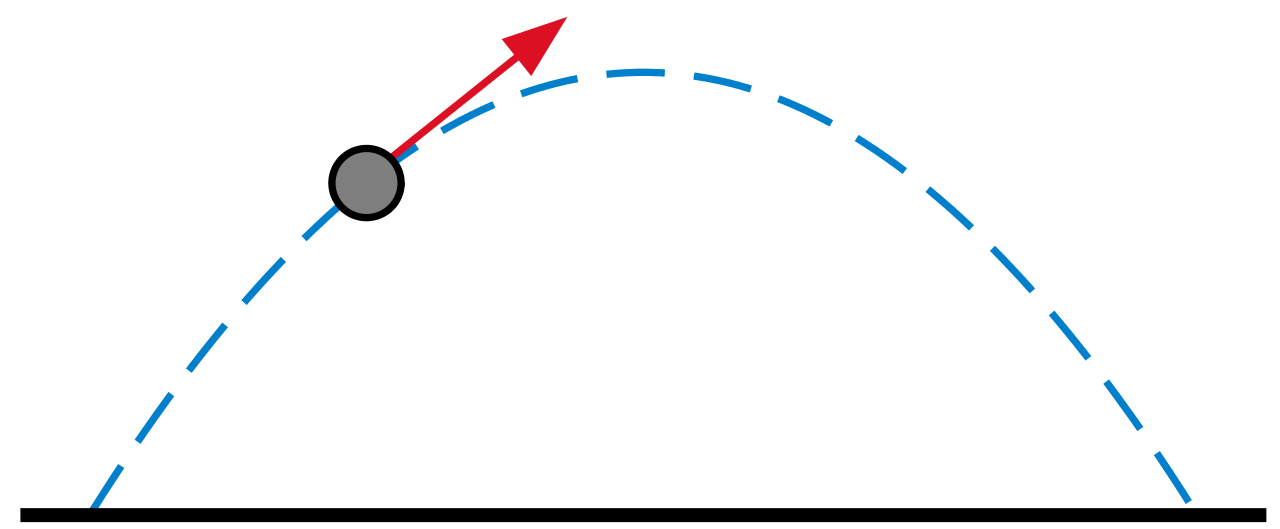

In [3]:
t = smp.symbols('t')
m = smp.symbols('m')
g = smp.symbols('g')

In this case our generalised coordinates are $x$ and $\theta$

In [4]:
x = smp.symbols(r'x', cls=smp.Function)
y = smp.symbols(r'y', cls=smp.Function)

Explicitly write them as functions of time $t$:

In [5]:
x = x(t)
y = y(t)

Find the derivatives: $\dot x$, $\ddot x$, $\dot y$, $\ddot y$

In [6]:
x_d = smp.diff(x, t)
x_dd = smp.diff(x_d, t)
y_d = smp.diff(y, t)
y_dd = smp.diff(y_d, t)

Express kinetic and potential energy in terms of the generalised coordinates

In [7]:
# Kinetic energy: 1/2 M * V * V
T = 1/2* m *(smp.diff(x,t)**2 + smp.diff(y,t)**2)

# Potential energy: m*g*h
V = m*g*y

L = T - V

Get Lagrnage's Equations: 
$$ \frac{\partial L}{\partial x} - \frac{d}{dt}\frac{\partial L}{\partial \dot x} = 0   $$

In [8]:
L

-g*m*y(t) + 0.5*m*(Derivative(x(t), t)**2 + Derivative(y(t), t)**2)

In [9]:
LE1 = smp.diff(L,x) - smp.diff(smp.diff(L,x_d),t).simplify()
LE2 = smp.diff(L,y) - smp.diff(smp.diff(L,y_d),t).simplify()

In [10]:
LE2

-g*m - 1.0*m*Derivative(y(t), (t, 2))

In [11]:
sols = smp.solve([LE1,LE2],(x_dd,y_dd), simlpify=True, rational=False)

In [12]:
sols


{Derivative(x(t), (t, 2)): 0, Derivative(y(t), (t, 2)): -1.0*g}

With the solution for the equations of motion of the system, undo the symbolic expression and perform integration. We now have an equation dependant on $\dot\theta$ and other parameters, we have indeed two equations (symilar to state space representation). In this case we will assume $z_1 = \dot\theta_1$.

In [13]:
dz1dt_f = smp.lambdify((t,m,g,x,x_d,y,y_d),sols[x_dd])
dxdt_f = smp.lambdify(x_d,x_d)
dz2dt_f = smp.lambdify((t,m,g,x,x_d,y,y_d),sols[y_dd])
dydt_f = smp.lambdify(y_d,y_d)

Define a functions to solve for the system of ODEs

In [14]:
def dSdt(S,t,m1,k):
    x, z1, y, z2 = S
    return [dxdt_f(z1), dz1dt_f(t,m,g,x,z1,y,z2), dydt_f(z2), dz2dt_f(t,m,g,x,z1,y,z2)]

In [15]:
t_final = 10
frms = 25*t_final
t = np.linspace(0,10,frms)
m = 0.5
g = 9.8
ans = odeint(dSdt, y0 =[0,6,0, 6], t=t, args=(m,g))

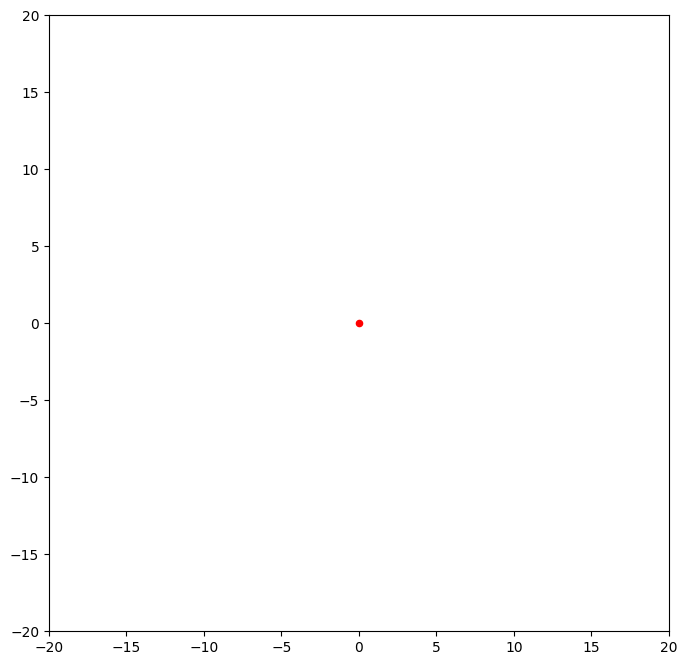

In [19]:
x, y = ans[:,0], ans[:,2]
fig, ax = plt.subplots(1,1,figsize=(8,8))
def update(i):
# clear the axis each frame
    ax.clear()
    # replot things
    ax.scatter(x[i],y[i],s = 20, c = 'r')
    ax.plot(x[:i],y[:i],c= 'r',linestyle='--')
    lim = 20
    ax.set_xlim((-lim, lim))
    ax.set_ylim((-lim, lim))

ani = animation.FuncAnimation(fig, update, frames=frms, interval=1)
ani.save('Free_mass.gif',writer='pillow',fps=25)
